# Compare to climatology

In [1]:
import sys
sys.path.append("../")

from netCDF4 import Dataset, MFDataset
import pyfesom as pf
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from matplotlib import cm

Load FESOM mesh

In [2]:
%%time
meshpath  ='/csys/nobackup1_CLIDYN/nkolduno/pyfesom/DATA/mesh/COREII'
mesh = pf.load_mesh(meshpath, get3d=True, usepickle=True)

The *usepickle = True* and the pickle file (*pickle_mesh*) exists.
 We load the mesh from it.
CPU times: user 1.09 s, sys: 184 ms, total: 1.28 s
Wall time: 1.29 s


Load data

In [3]:
fl = MFDataset('/csys/nobackup1_CLIDYN/nkolduno/pyfesom/DATA/results/COREII/fesom.????.oce.mean.nc')

Calculate mean salinity

In [4]:
salt = fl.variables['salt'][:,:].mean(axis=0)

Create an object that contains data from the WOA 2005. You just have to provide the path to the data location (by default WOA05 data are used).

In [5]:
w = pf.climatology('/csys/nobackup1_CLIDYN/nkolduno/pyfesom/DATA/climatology/')

Next we interpolate data from FESOM grid to the WOA grid. One have to provide data (one dimentional array with all the points), mesh object and climatology object.

In [6]:
%%time
xx,yy,zz_salt = pf.fesom_2_clim(salt, mesh, w, verbose=False)

/scratch/users/nkolduno/miniconda2/lib/python2.7/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


CPU times: user 1.46 s, sys: 12 ms, total: 1.48 s
Wall time: 1.39 s


And now plot the result

In [7]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
x,y = m(xx,yy) # coordinates for target grid

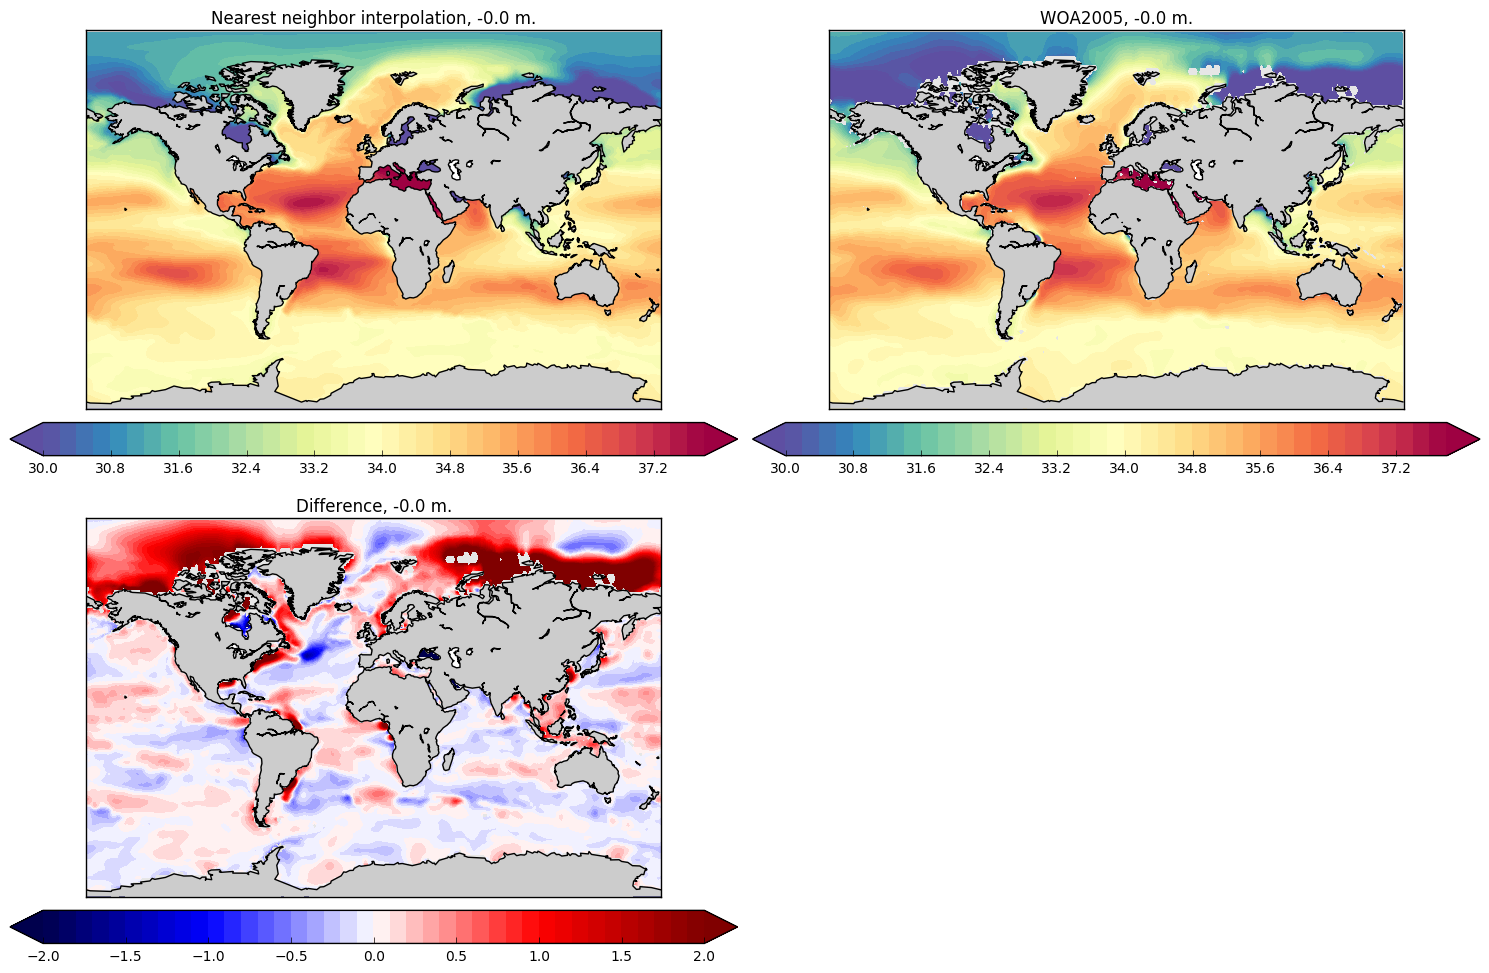

In [8]:
nlevel = 0 # change it to get results on different layers.

plt.figure(figsize=(15,10))
plt.subplot(221)
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(30., 38., 0.2)
plt.contourf(x, y, zz_salt[nlevel,:,:], levels = levels, \
                cmap=cm.Spectral_r, extend='both', zlev=0);
plt.colorbar(orientation = 'horizontal', pad=0.03)
plt.title('Nearest neighbor interpolation, {} m.'.format(str(mesh.zlevs[nlevel])));

plt.subplot(222)
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(30., 38., 0.2)
plt.contourf(x, y, w.S[nlevel,:,:], levels = levels, \
                cmap=cm.Spectral_r, extend='both', zlev=0);
plt.colorbar(orientation = 'horizontal', pad=0.03)
plt.title('WOA2005, {} m.'.format(str(mesh.zlevs[nlevel])));
plt.subplot(223)
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(-2., 2.1, 0.1)
plt.contourf(x, y, zz_salt[nlevel,:,]-w.S[nlevel,:,:], levels = levels, \
                cmap=cm.seismic, extend='both', zlev=0);
plt.colorbar(orientation = 'horizontal', pad=0.03)
plt.title('Difference, {} m.'.format(str(mesh.zlevs[nlevel])));
plt.tight_layout()

There is some crazy bias in the Arctic Ocean. But we know that WOA is famous for being quite bad in the Arctic, so we compare to [PHC3.0](http://psc.apl.washington.edu/nonwp_projects/PHC/Climatology.html) climatology. We have to specify *climname* parameter.

In [12]:
p = pf.climatology('/csys/nobackup1_CLIDYN/nkolduno/pyfesom/DATA/climatology/',\
                   climname='phc')

In [13]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
x,y = m(xx,yy) # coordinates for target grid

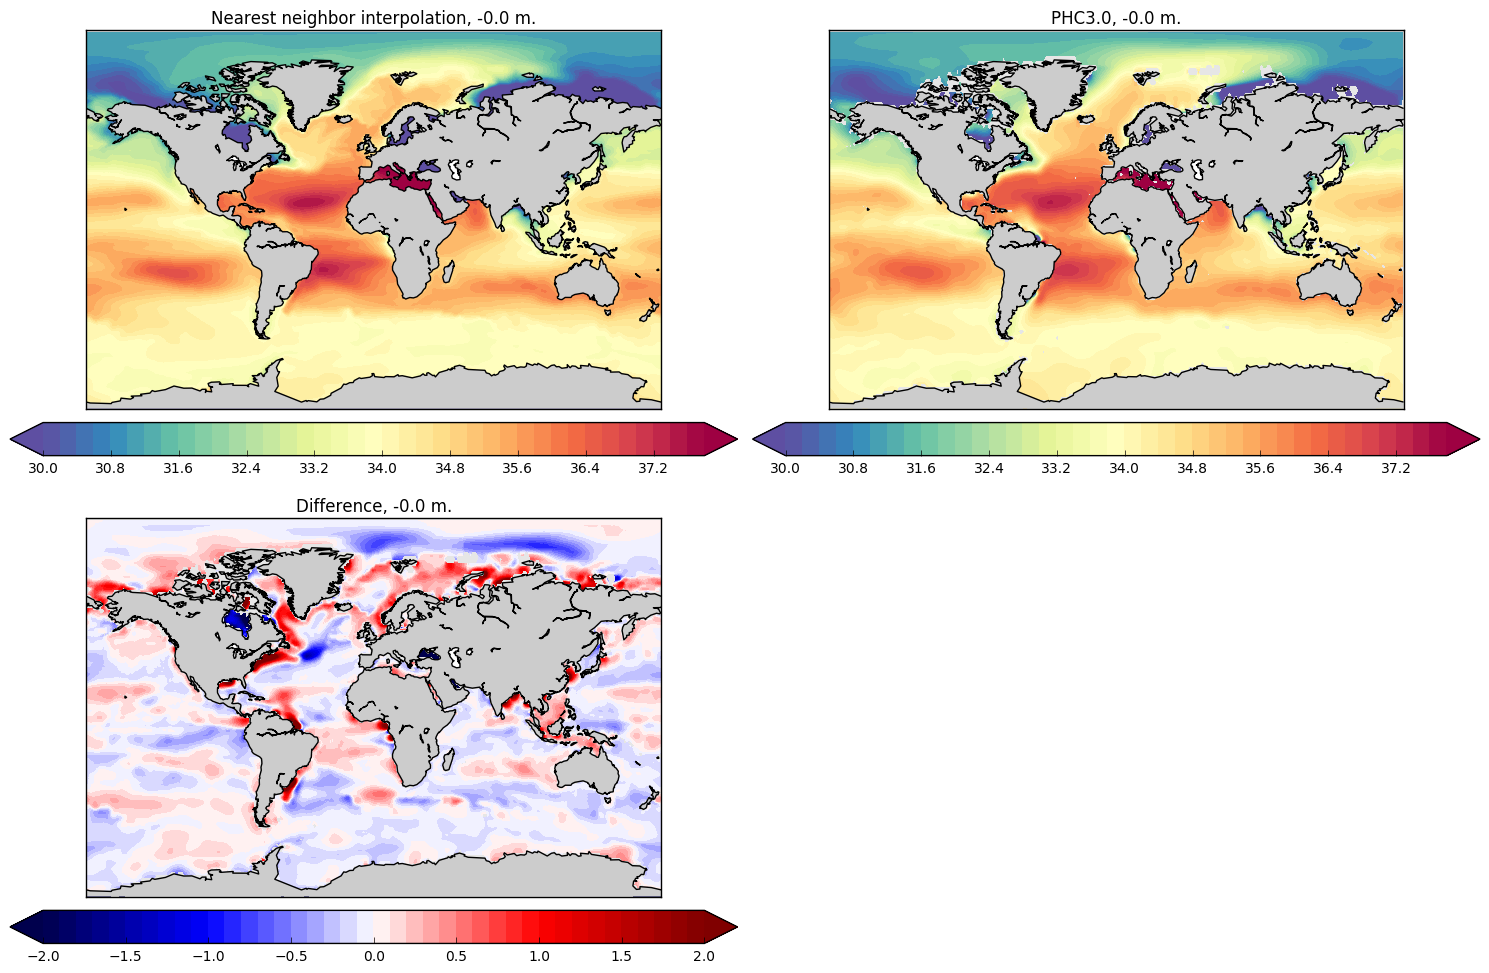

In [14]:
nlevel = 0 # change it to get results on different layers.

plt.figure(figsize=(15,10))
plt.subplot(221)
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(30., 38., 0.2)
plt.contourf(x, y, zz_salt[nlevel,:,:], levels = levels, \
                cmap=cm.Spectral_r, extend='both', zlev=0);
plt.colorbar(orientation = 'horizontal', pad=0.03)
plt.title('Nearest neighbor interpolation, {} m.'.format(str(mesh.zlevs[nlevel])));

plt.subplot(222)
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(30., 38., 0.2)
plt.contourf(x, y, p.S[nlevel,:,:], levels = levels, \
                cmap=cm.Spectral_r, extend='both', zlev=0);
plt.colorbar(orientation = 'horizontal', pad=0.03)
plt.title('PHC3.0, {} m.'.format(str(mesh.zlevs[nlevel])));
plt.subplot(223)
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(-2., 2.1, 0.1)
plt.contourf(x, y, zz_salt[nlevel,:,]-p.S[nlevel,:,:], levels = levels, \
                cmap=cm.seismic, extend='both', zlev=0);
plt.colorbar(orientation = 'horizontal', pad=0.03)
plt.title('Difference, {} m.'.format(str(mesh.zlevs[nlevel])));
plt.tight_layout()

Looks better :)